<a href="https://colab.research.google.com/github/subhadip2510/Hotel-Booking-Analysis-EDA/blob/main/EDA_ProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name : Hotel Booking Analysis
### **Project Type** - Exploratory Data Analysis
### **Contribution** - Individual

### **Name** : Subhadip Ghosh


# Project Summary -
### This project aims to analyze a comprehensive dataset containing booking information for both a city hotel and a resort hotel, with the objective of uncovering insights into booking patterns, customer demographics, and parking space utilization. By employing descriptive and inferential statistical analysis techniques, including descriptive statistics, data visualization, and hypothesis testing, we seek to identify trends in booking behavior, understand the distribution of guest demographics, and assess parking space utilization across different scenarios. The anticipated outcomes include actionable insights to inform strategic decision-making for hotel management, such as pricing adjustments, targeted marketing strategies, and optimization of parking space allocation to enhance guest satisfaction and drive business success within the hospitality industry.

# GitHub Link - ###

# Importing Libraries

In [ ]:
# Importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
hotel_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Hotel Bookings.csv") #Reading Data file

In [ ]:
# Quick Intro of Data

hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Cleaning data
### Cleaning data is crucial step before EDA as it will remove the ambigous  data that can affect the outcome of EDA.

#Removing duplicate rows if any

In [ ]:
# Creating a copy of the Dataframe
df1 = hotel_df.copy()

In [ ]:
df1[df1.duplicated()].shape #To show no. of duplicated rows

(31994, 32)

In [ ]:
# Dropping Duplicate values
df1.drop_duplicates(inplace = True)
df1.shape

(87396, 32)

# Handling Missing Values

In [ ]:
#Columns with missing values.
df1.isnull().sum().sort_values(ascending = False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


#### In situations where customers haven't utilized the services of any agent or company to book a hotel, it's possible for the "company" and "agent" columns to contain null values. In such cases, it's prudent to replace these null values with 0. This ensures consistency in the data representation, making it easier to handle and analyze effectively.

In [ ]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

#### This column 'children' has 0 as value which means 0 children were present in group of customers who made that transaction.
####So, 'nan' values are the missing values due to error of recording data.
####We will replace the null values under this column with mean value of children.

In [ ]:
df1['children'].fillna(df1['children'].mean(), inplace=True)

#### Next column with missing value is 'country'. This column represents the country of oriigin of customer. Since, this column has datatype of string. We will replace the missing value with the mode of 'country' column.

In [ ]:
df1['country'].fillna('others', inplace = True)

In [ ]:
# Final Check if Nul values are removed
df1.isnull().sum().sort_values()

hotel                             0
total_of_special_requests         0
required_car_parking_spaces       0
adr                               0
customer_type                     0
days_in_waiting_list              0
company                           0
agent                             0
deposit_type                      0
booking_changes                   0
assigned_room_type                0
reserved_room_type                0
previous_bookings_not_canceled    0
previous_cancellations            0
is_repeated_guest                 0
distribution_channel              0
market_segment                    0
country                           0
meal                              0
babies                            0
children                          0
adults                            0
stays_in_week_nights              0
stays_in_weekend_nights           0
arrival_date_day_of_month         0
arrival_date_week_number          0
arrival_date_month                0
arrival_date_year           

#### There are some rows with total no. of adults, childern or babies equal to zer. So we will remove such rows.

In [ ]:
df1[df1['adults']+df1['babies']+df1['children'] == 0 ]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,No Deposit,0.0,174.0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,No Deposit,0.0,174.0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,No Deposit,38.0,0.0,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,No Deposit,308.0,0.0,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,No Deposit,7.0,0.0,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,No Deposit,0.0,0.0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,No Deposit,425.0,0.0,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,No Deposit,9.0,0.0,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


In [ ]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

# **Converting columns to required datatypes**.

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')


In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')


# Adding required columns.

In [ ]:
# Adding total staying days in hotels
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

# Exploratory Data Analysis

#### Let's begin by computing the correlation among the numerical variables in the dataset. We'll exclude columns representing categorical data in numerical form, such as 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', and 'agent'.
#### Furthermore, we've introduced 'total_stay' and 'total_people' columns, allowing us to eliminate redundant features like 'adults', 'children', 'babies', 'stays_in_weekend_nights', and 'stays_in_week_nights'.
#### This process optimizes the dataset, concentrating solely on pertinent numerical attributes for correlation assessment.

In [ ]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

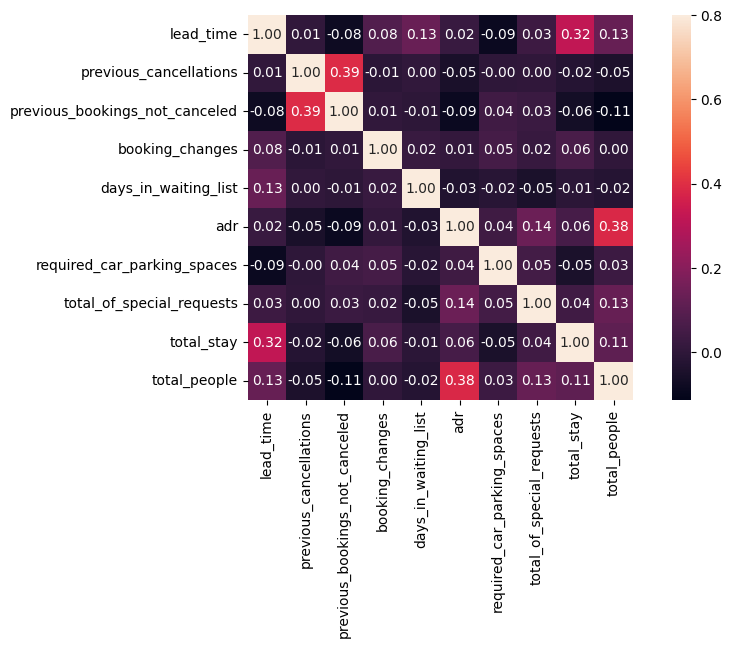

In [ ]:
#correlation matrix
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);


####1. adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.
####2. Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.


###**Lets check how does length of stay affects the adr.**

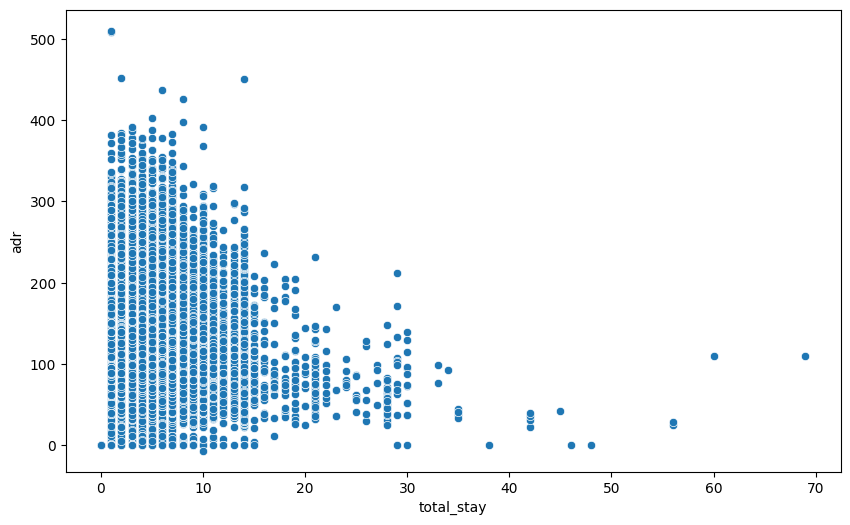

In [ ]:
df1.drop(df1[df1['adr']>5000].index, inplace = True) #To remove any outlier for better scatter plot.


plt.figure(figsize = (10, 6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

###**Meal that is most preffered**

<ipython-input-24-dc59e63bc9c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df1['meal'], palette='Set2')


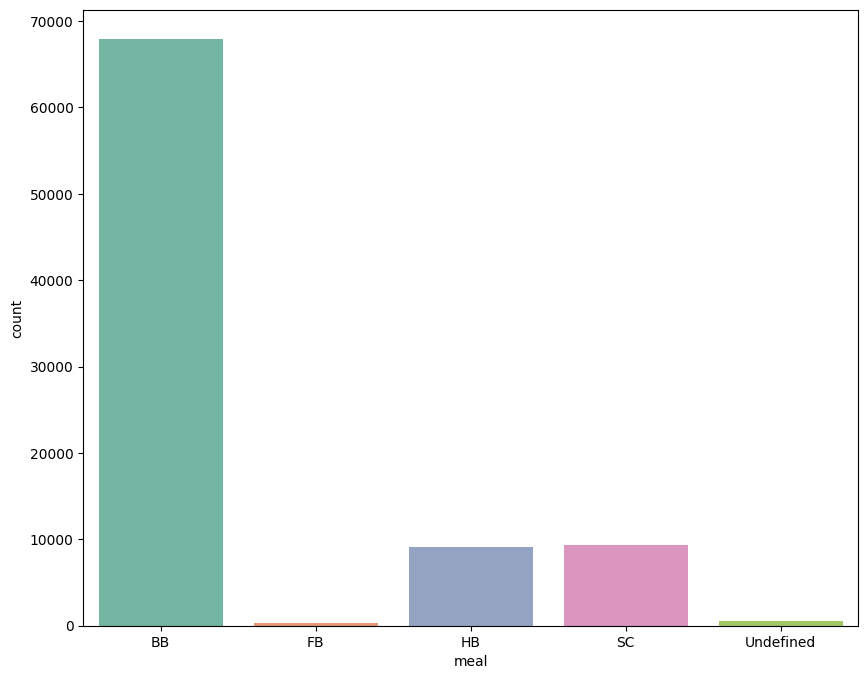

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x=df1['meal'], palette='Set2')
plt.show()

#### The most preffered meal type is BB (Bed and Breakfast)

<ipython-input-25-7a89488f33f8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = d1['hotel'], y = d1['Booking %'], palette='Set2' )


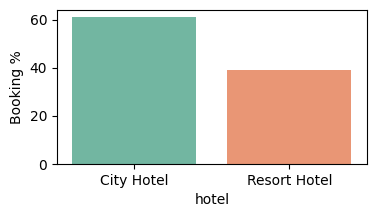

In [ ]:
grouped_by_hotel = df1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (4,2))
sns.barplot(x = d1['hotel'], y = d1['Booking %'], palette='Set2' )
plt.show()

#### Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.



### **Lets find which hotel is making more revenue ?**

<ipython-input-26-1ae95339e99c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = d3['hotel'], y = d3['avg_adr'], palette = 'Set1' )


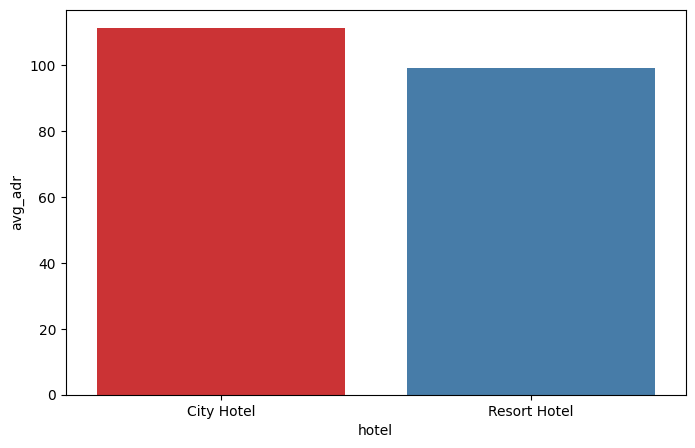

In [ ]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})   # calculating average adr
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'], palette = 'Set1' )
plt.show()

#### Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

###**Which hotel has higher lead time?**

<ipython-input-27-a94ad1a7a277>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = d2['hotel'], y = d2['median_lead_time'], palette = "Set3" )


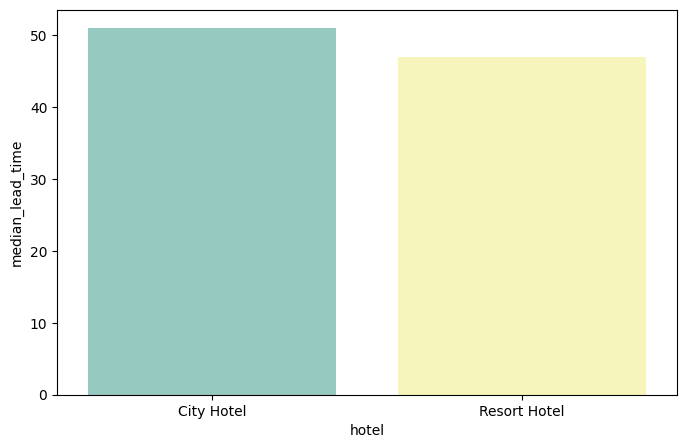

In [ ]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'], palette = "Set3" )
plt.show()

#### City hotel has slightly higher median lead time. Also median lead time is significantly higher in each case, this means customers generally plan their hotel visits way to early.

### **Lets find most common stay length in terms of hotel.**

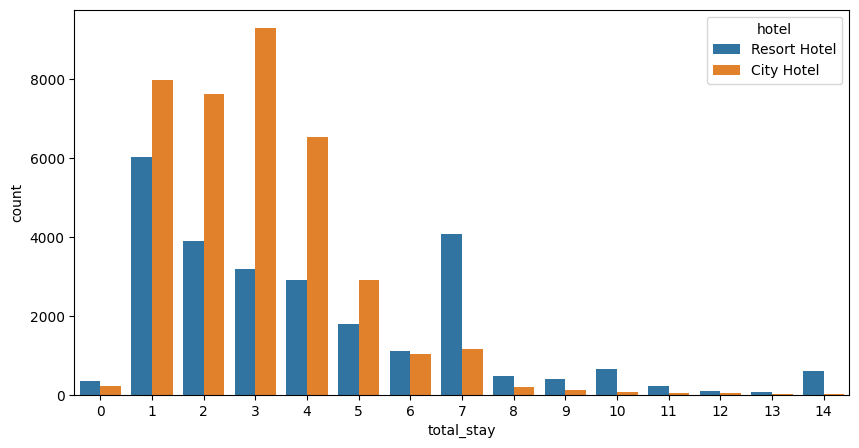

In [ ]:
not_canceled = df1[df1['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()

#### Most common stay length is less than 4 days and generally people prefer City hotel for short stay, but for long stays, Resort Hotel is preferred.

### Which hotel has longer waiting time?

<ipython-input-29-55060acca7fb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'], palette = "Set3" )


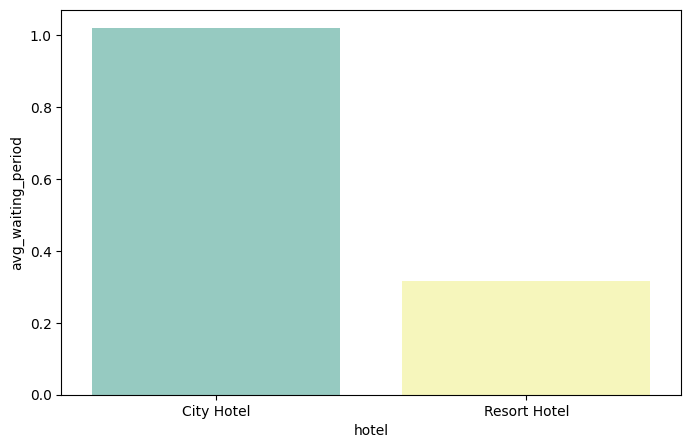

In [ ]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'], palette = "Set3" )
plt.show()

#### City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

### Which hotel has higher bookings cancellation rate ?


In [ ]:
# Selecting and counting number of cancelled bookings for each hotel.
cancelled_data = df1[df1['is_canceled'] == 1]
cancel_grp = cancelled_data.groupby('hotel')
D1 = pd.DataFrame(cancel_grp.size()).rename(columns = {0:'total_cancelled_bookings'})

# Counting total number of bookings for each type of hotel
grouped_by_hotel = df1.groupby('hotel')
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating cancel percentage
D3['cancel_%'] = round((D3['total_cancelled_bookings']/D3['total_bookings'])*100,2)
D3

,total_cancelled_bookings,total_bookings,cancel_%
hotel,,,
City Hotel,16034,53273,30.10
Resort Hotel,7974,33956,23.48


<ipython-input-31-85538beff113>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = D3.index, y = D3['cancel_%'], palette = "Set3")


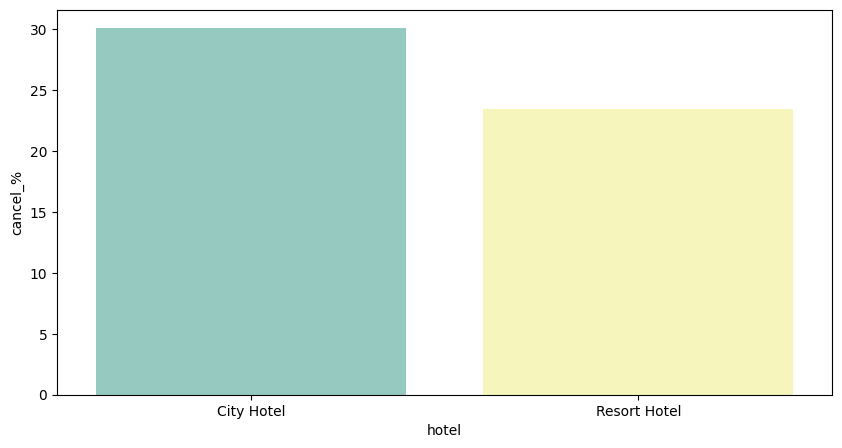

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['cancel_%'], palette = "Set3")
plt.show()

##### From above it can be concluded that 30% City hotel booking got cancelled.

### Which hotel has high chance that its customer will return for another stay?

<ipython-input-32-6df1765c9812>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = D3.index, y = D3['repeat_%'], palette = 'Set1')


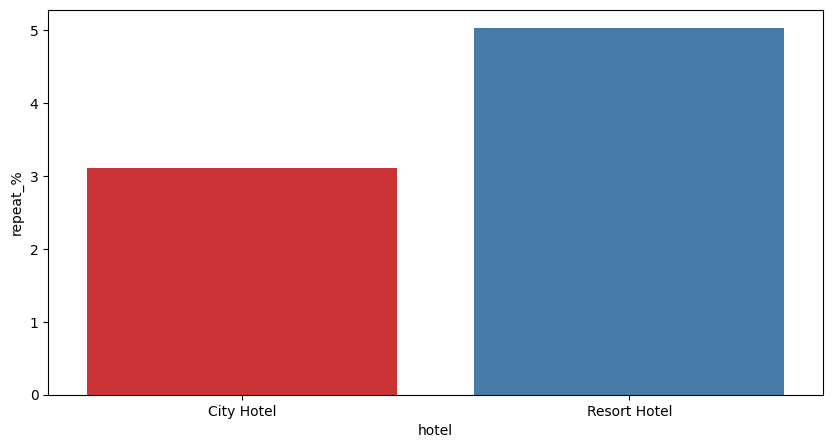

In [ ]:
# Selecting and counting repeated customers bookings
repeated_data = df1[df1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'], palette = 'Set1')
plt.show()

##### From above it can be concluded that Resort Hotel has slightly hihger repeat percentage then city hotel.

### Which is the most common channel for booking hotels?

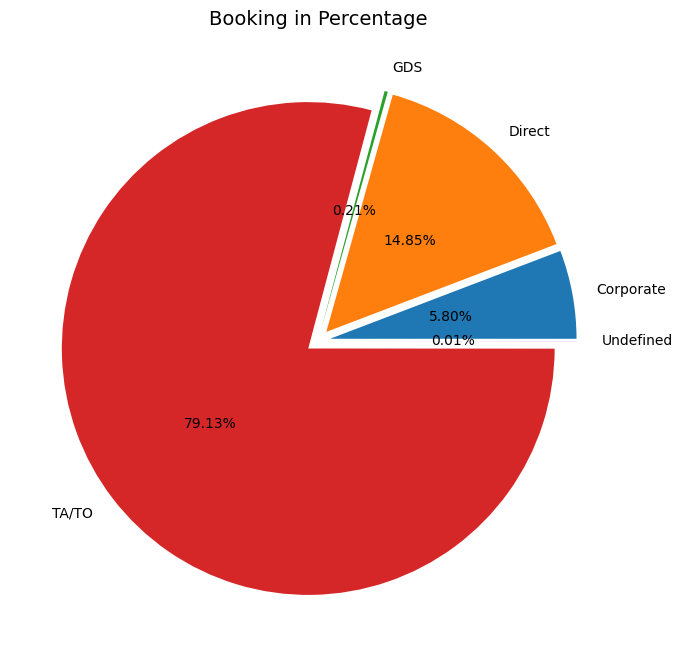

In [ ]:
group_by_dc = df1.groupby('distribution_channel')
d1 = pd.DataFrame(round((group_by_dc.size()/df1.shape[0])*100,2)).reset_index().rename(columns = {0: 'Booking_%'})
plt.figure(figsize = (8,8))
data = d1['Booking_%']
labels = d1['distribution_channel']
plt.pie(x=data, autopct="%.2f%%", explode=[0.05]*5, labels=labels, pctdistance=0.5)
plt.title("Booking in Percentage", fontsize=14);

##### From above visualization it can be seen that we have used pie chart to determine the percentage.


### Which channel has longer average waiting time?

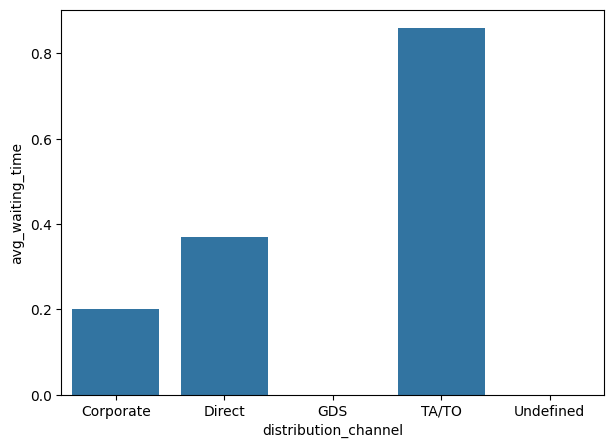

In [ ]:
d4 = pd.DataFrame(round((group_by_dc['days_in_waiting_list']).mean(),2)).reset_index().rename(columns = {'days_in_waiting_list': 'avg_waiting_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d4['distribution_channel'], y = d4['avg_waiting_time'])
plt.show()

##### While booking via TA/TO one may have to wait a little longer to confirm booking of rooms.

### Which distribution channel brings better revenue generating deals for hotels?

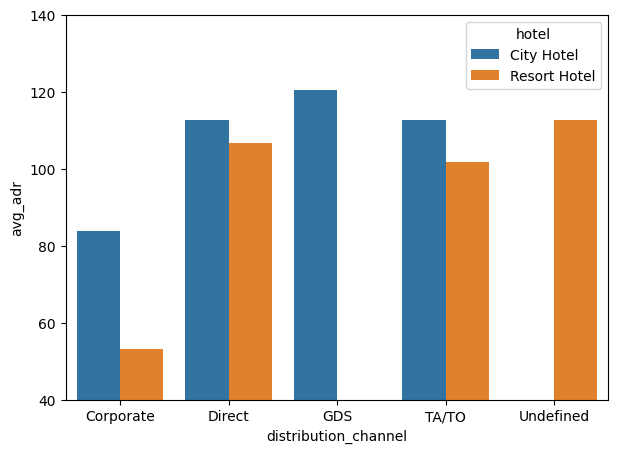

In [ ]:
group_by_dc_hotel = df1.groupby(['distribution_channel', 'hotel'])
d5 = pd.DataFrame(round((group_by_dc_hotel['adr']).agg(np.mean),2)).reset_index().rename(columns = {'adr': 'avg_adr'})
plt.figure(figsize = (7,5))
sns.barplot(x = d5['distribution_channel'], y = d5['avg_adr'], hue = d5['hotel'], )
plt.ylim(40,140)
plt.show()

##### GDS channel brings higher revenue generating deals for City hotel, in contrast to that most bookings come via TA/TO. City Hotel can work to increase outreach on GDS channels to get more higher revenue generating deals.

##### Resort hotel has more revnue generating deals by direct and TA/TO channel. Resort Hotel need to increase outreach on GDS channel to increase revenue.

### Which significant distribution channel has highest cancellation percentage?

<ipython-input-37-258ef21e2cc9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = d1.index, y = d1['Cancel_%'], palette = 'Set1')


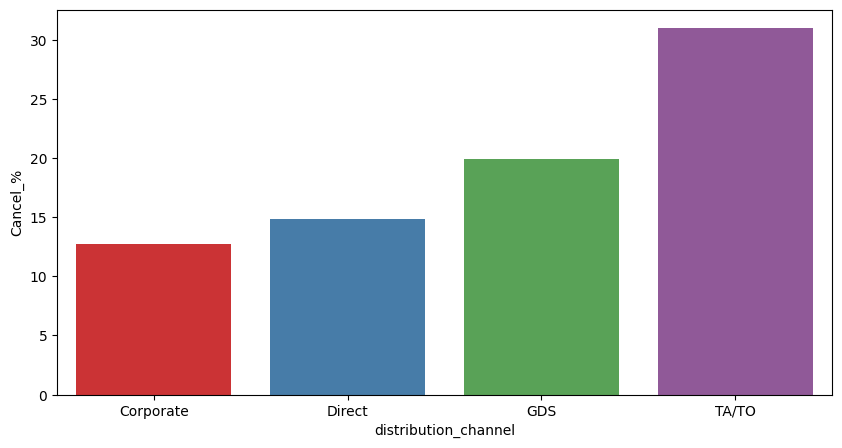

In [ ]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'], palette = 'Set1')
plt.show()

##### TA/TO has highest booking cancellation %. Therefore, a booking via TA/TO is 30% likely to get cancelled.

In [ ]:
filter = df1['is_canceled'] == 0
data = df1[filter]
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2


In [ ]:

data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

<ipython-input-39-a6d36badedd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_stay,total_people,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.0,0,0,Check-Out,2015-07-01,0,2,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.0,0,0,Check-Out,2015-07-02,1,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.0,0,1,Check-Out,2015-07-03,2,2,2


In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})



,total_nights,hotel,Number of stays
0,0,City Hotel,218
1,0,Resort Hotel,350
2,1,City Hotel,7972
3,1,Resort Hotel,6036
4,2,City Hotel,7630
...,...,...,...
57,46,Resort Hotel,1
58,48,City Hotel,1
59,56,Resort Hotel,1
60,60,Resort Hotel,1


<Axes: xlabel='total_nights', ylabel='Number of stays'>

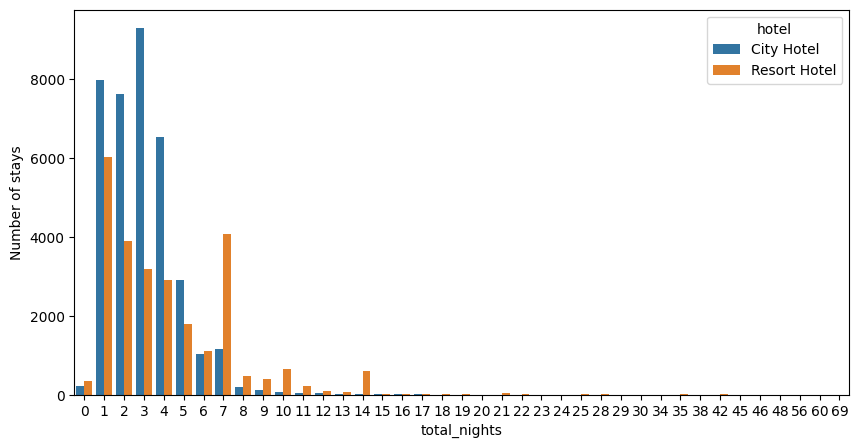

In [ ]:
# Plotting
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

##### Most people prefer to stay at the hotels of <=5 days.

### From where the most guests are coming?

In [ ]:
country_wise_guests = df1[df1['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_guests.columns = ['country', 'No of guests']
country_wise_guests

,country,No of guests
0,PRT,17573
1,GBR,8440
2,FRA,7091
3,ESP,5382
4,DEU,4332
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


In [ ]:
basemap = folium.Map()
guests_map = px.choropleth(country_wise_guests, locations = country_wise_guests['country'],color = country_wise_guests['No of guests'], hover_name = country_wise_guests['country'])
guests_map.show()

##### Most guests are from european continent. Lets make it more accurate.

<ipython-input-45-74c6616261fd>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




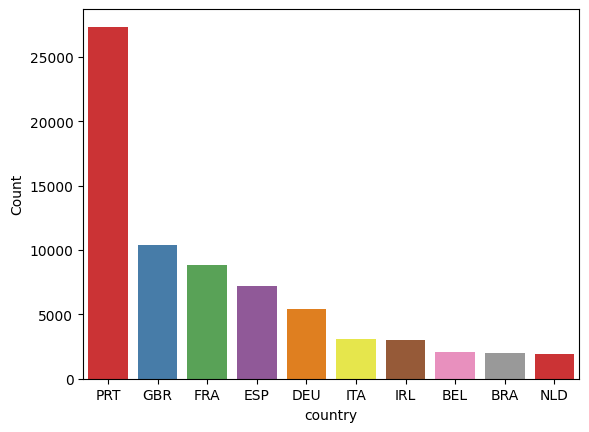

In [ ]:
grouped_by_country = df1.groupby('country')
d1 = pd.DataFrame(grouped_by_country.size()).reset_index().rename(columns = {0:'Count'}).sort_values('Count', ascending = False)[:10]
sns.barplot(x = d1['country'], y  = d1['Count'], palette = 'Set1')
plt.show()

###### Most guest are from Portugal and other Europian contries.

# Dataset Overview
### Source: /mnt/data/Hotel Bookings.csv

### Number of Records: 119,390

### Key Variables:

### hotel: Type of hotel (City Hotel or Resort Hotel)
### is_canceled: Whether the booking was canceled (1) or not (0)
### lead_time: Number of days between booking and arrival
### arrival_date_year: Year of arrival date
### arrival_date_month: Month of arrival date
### arrival_date_week_number: Week number of year for arrival date
### arrival_date_day_of_month: Day of arrival date
### stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
### stays_in_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
### adults: Number of adults
### children: Number of children
### babies: Number of babies
### meal: Type of meal booked
### country: Country of origin of the guest
### market_segment: Market segment designation
### distribution_channel: Booking distribution channel
### is_repeated_guest: Whether the guest is a repeated guest (1) or not (0)
### previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
### previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
### reserved_room_type: Code of room type reserved
### assigned_room_type: Code for the type of room assigned to the booking
### booking_changes: Number of changes made to the booking
### deposit_type: Type of deposit made for the booking
### agent: ID of the travel agency that made the booking
### company: ID of the company/entity that made the booking or responsible for the booking
### days_in_waiting_list: Number of days the booking was in the waiting list before it was confirmed
### customer_type: Type of customer (e.g., Contract, Group, Transient, Transient-party)
### adr: Average Daily Rate, as defined by dividing the sum of all lodging transactions by the total number of staying nights
### required_car_parking_spaces: Number of car parking spaces required by the customer
### total_of_special_requests: Total number of special requests made by the customer (e.g., high floor, view, etc.)
### reservation_status: Reservation status (e.g., Canceled, Check-Out)
### reservation_status_date: Date at which the last status was set
### Unnamed: 32: A column with no name, possibly a placeholder or error
### 0: A column with no name, possibly a placeholder or error
# Purpose of the Analysis
## The aim of this exploratory data analysis (EDA) project is to gain insights into hotel booking patterns, cancellations, customer behaviors, and other key metrics. The analysis helps in understanding trends, identifying potential issues, and making data-driven decisions for better hotel management and customer satisfaction.

# Analysis and Visualizations
## The project includes various analyses and visualizations such as:

### Booking Lead Time Analysis: Understanding how lead times vary across different market segments.
### Cancellation Rates: Analyzing cancellation rates by market segment, country, and hotel type.
### Average Daily Rate (ADR) Analysis: Comparing ADR across different room types and hotel types.
### Length of Stay Analysis: Examining the impact of the length of stay on ADR across market segments.
### Special Requests and Booking Lead Time: Investigating if guests with special requests tend to book their stays further in advance.
### Customer Demographics: Insights into the demographics of guests such as the number of adults, children, and babies.
### This README provides a compact overview of the dataset and the key analyses performed.
